In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import scipy as sp
import SimilarityMatrixAnalysis as sm


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
mice = ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
     '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4',
     '4139265.3','4139265.5']
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]



G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [3]:
print(df.columns)

Index(['MouseName', 'DateFolder', 'SessionNumber', 'Track', 'RewardCount',
       'Imaging', 'ImagingRegion', 'DateTime', 'data file', 'scanfile',
       'scanmat', 's2pfolder'],
      dtype='object')


In [4]:
tt_mice = ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5']
reversal_mice = ['4139251.1','4139260.1','4139261.2']
notask_mice = ['4139266.3','4139265.4','4139265.3','4139265.5']


num aberrant ttls 0.0


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(1901, 90) (90, 1901)
(1901, 180) (90, 1901)
(1901, 270) (90, 1901)
(1901, 360) (90, 1901)
num aberrant ttls 0.0
frame diff 0
(2060, 90) (90, 2060)
(2060, 180) (90, 2060)
(2060, 270) (90, 2060)
(2060, 360) (90, 2060)
num aberrant ttls 0.0
frame diff 0
(1904, 90) (90, 1904)
(1904, 180) (90, 1904)
(1904, 270) (90, 1904)
(1904, 360) (90, 1904)
num aberrant ttls 0.0
frame diff 0
(2207, 90) (90, 2207)
(2207, 180) (90, 2207)
(2207, 270) (90, 2207)
(2207, 360) (90, 2207)
num aberrant ttls 0.0
frame diff 0
(2115, 90) (90, 2115)
(2115, 180) (90, 2115)
(2115, 270) (90, 2115)
(2115, 360) (90, 2115)


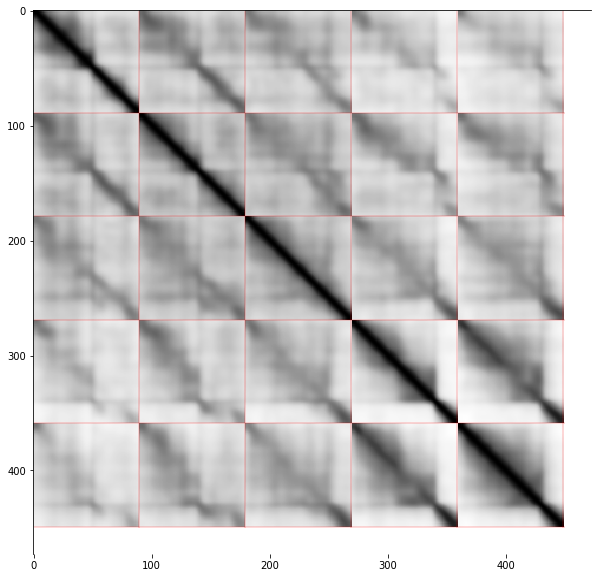

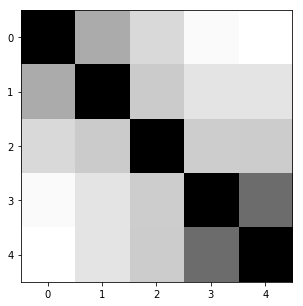

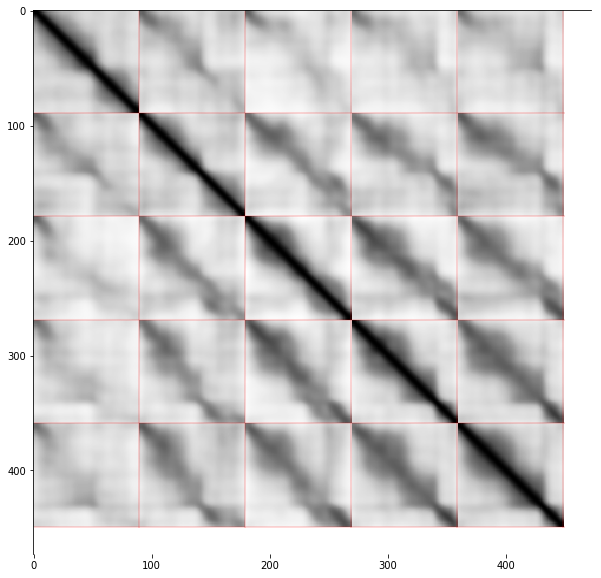

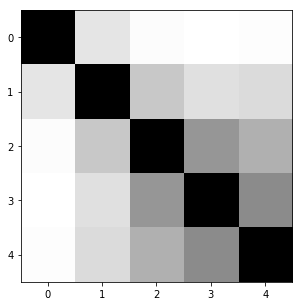

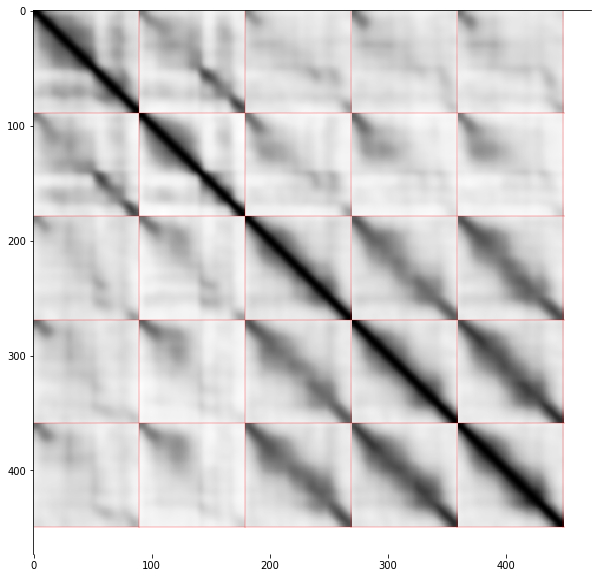

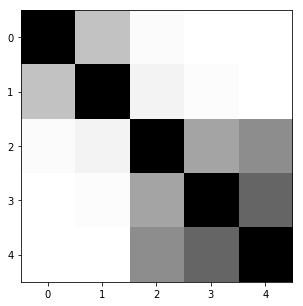

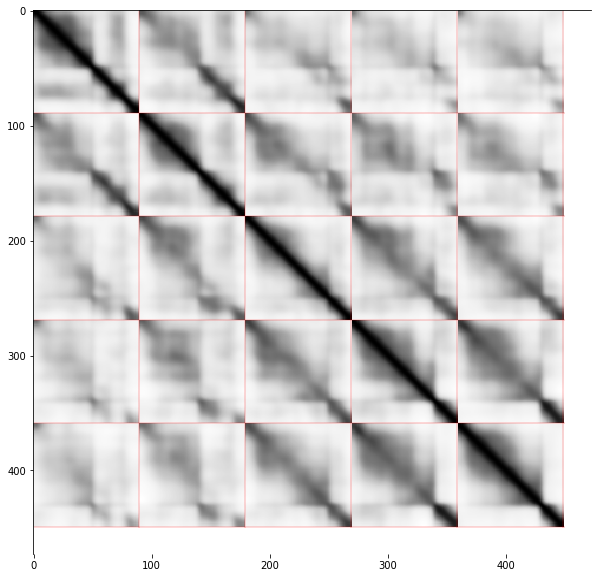

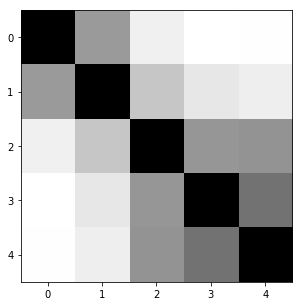

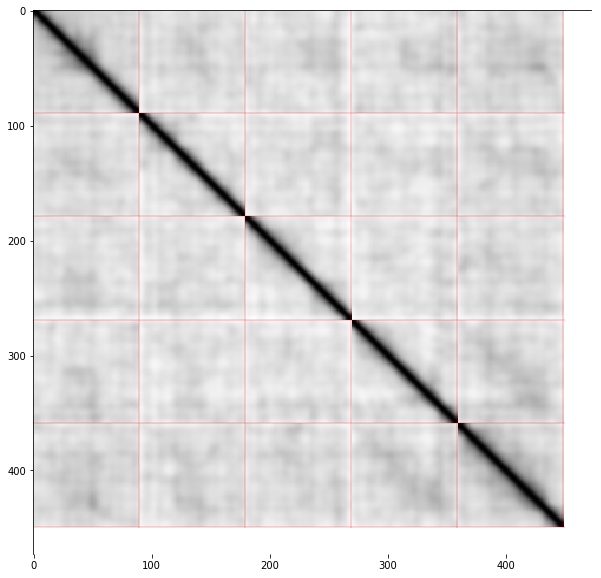

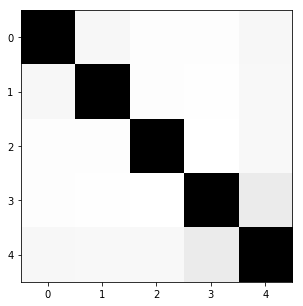

In [20]:
for m,mouse in enumerate(tt_mice):
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1') | df_mouse['ImagingRegion'].str.match('')]
    # no timeout 
    df_noTO = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout')]
    noTO_morph = df_noTO.iloc[-1]
    
    S_tmp,U_tmp,(f,ax),(f_U,ax_U)= sm.single_session(noTO_morph)
    if m == 0:
        S = np.zeros([S_tmp.shape[0],S_tmp.shape[1],len(tt_mice)])
        U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],len(tt_mice)])
    S[:,:,m]=S_tmp
    U[:,:,m]=U_tmp
    
    



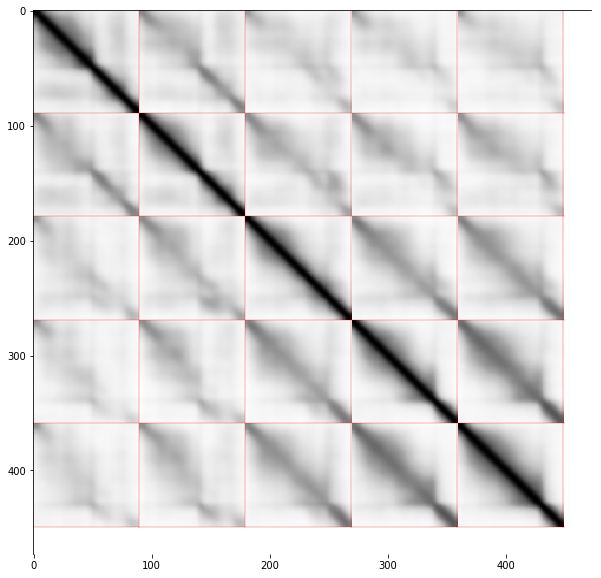

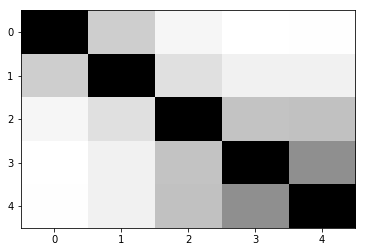

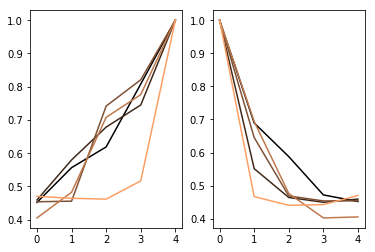

In [23]:
sm.plot_simmat(S.mean(axis=-1),5)
f,ax = plt.subplots()
ax.imshow(U.mean(axis=-1),aspect='auto',cmap='Greys')


f,ax = plt.subplots(1,2)
n = len(tt_mice)
for m in range(len(tt_mice)):
    ax[0].plot(U[-1,:,m],color= plt.cm.copper(m/n))
    ax[1].plot(U[0,:,m],color = plt.cm.copper(m/n))

num aberrant ttls 0.0


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(1860, 90) (90, 1860)
(1860, 180) (90, 1860)
(1860, 270) (90, 1860)
(1860, 360) (90, 1860)
num aberrant ttls 0.0
frame diff 0
(2038, 90) (90, 2038)
(2038, 180) (90, 2038)
(2038, 270) (90, 2038)
(2038, 360) (90, 2038)


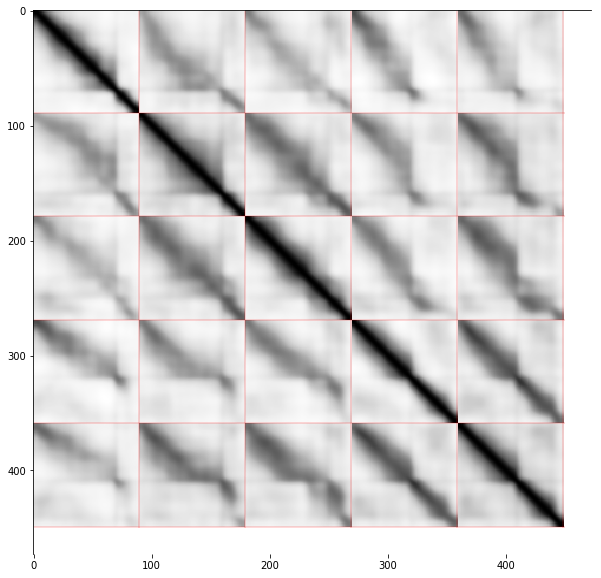

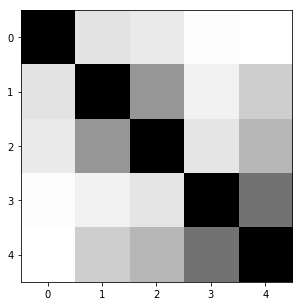

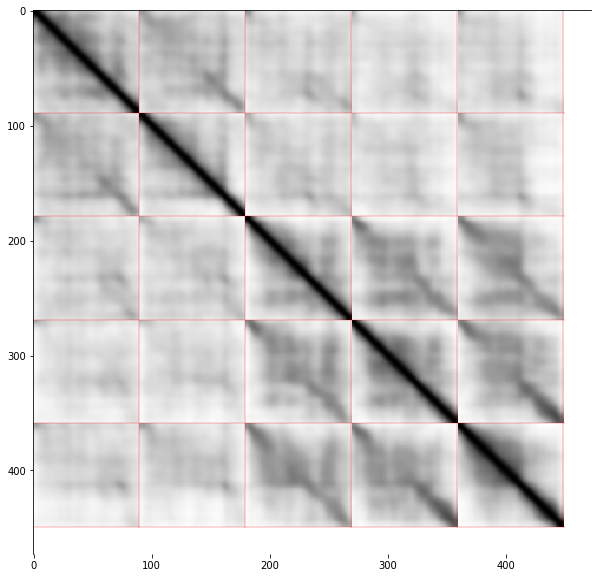

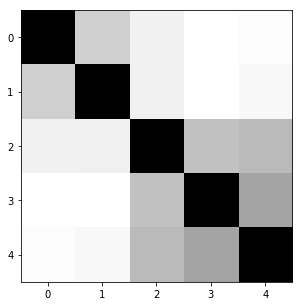

In [26]:
for m,mouse in enumerate(reversal_mice[:-1]):
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1') | df_mouse['ImagingRegion'].str.match('')]
    # no timeout 
    df_noTO = df_mouse[df_mouse['Track'].str.match('Reversal_noTimeout')]
    noTO_morph = df_noTO.iloc[-1]
    
    S_tmp,U_tmp,(f,ax),(f_U,ax_U)= sm.single_session(noTO_morph)
    if m == 0:
        S = np.zeros([S_tmp.shape[0],S_tmp.shape[1],len(tt_mice)])
        U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],len(tt_mice)])
    S[:,:,m]=S_tmp
    U[:,:,m]=U_tmp

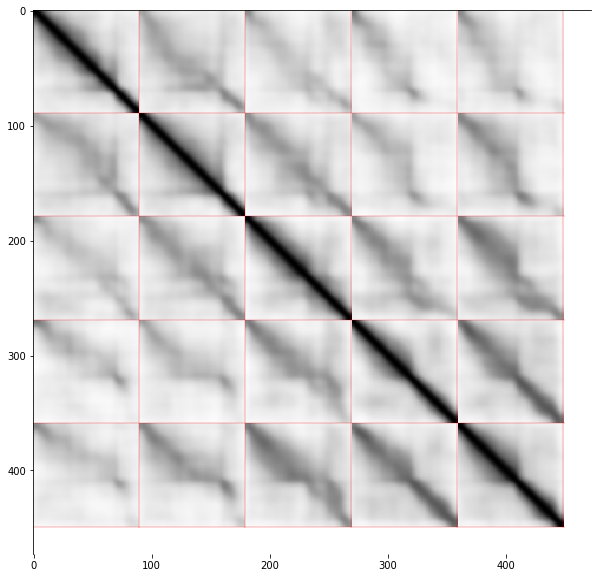

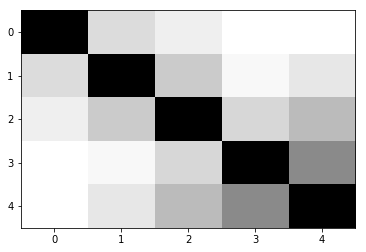

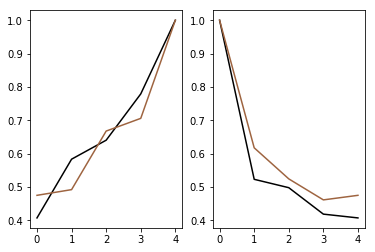

In [27]:
sm.plot_simmat(S.mean(axis=-1),5)
f,ax = plt.subplots()
ax.imshow(U.mean(axis=-1),aspect='auto',cmap='Greys')


f,ax = plt.subplots(1,2)
n = len(reversal_mice)-1
for m in range(n):
    ax[0].plot(U[-1,:,m],color= plt.cm.copper(m/n))
    ax[1].plot(U[0,:,m],color = plt.cm.copper(m/n))

num aberrant ttls 441.0


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(2083, 90) (90, 2083)
(2083, 180) (90, 2083)
(2083, 270) (90, 2083)
(2083, 360) (90, 2083)
num aberrant ttls 0.0
frame diff 0
(1890, 90) (90, 1890)
(1890, 180) (90, 1890)
(1890, 270) (90, 1890)
(1890, 360) (90, 1890)
num aberrant ttls 0.0
frame diff 0
(1251, 90) (90, 1251)
(1251, 180) (90, 1251)
(1251, 270) (90, 1251)
(1251, 360) (90, 1251)
num aberrant ttls 0.0
frame diff 0
(1941, 90) (90, 1941)
(1941, 180) (90, 1941)
(1941, 270) (90, 1941)
(1941, 360) (90, 1941)
num aberrant ttls 0.0
frame diff 0
(1386, 90) (90, 1386)
(1386, 180) (90, 1386)
(1386, 270) (90, 1386)
(1386, 360) (90, 1386)


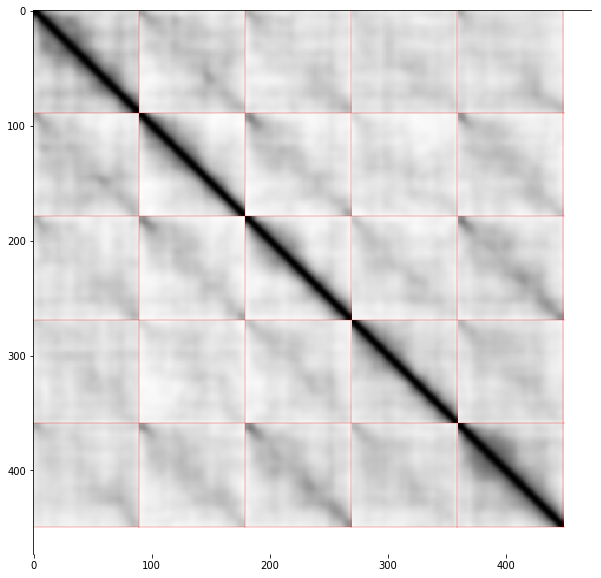

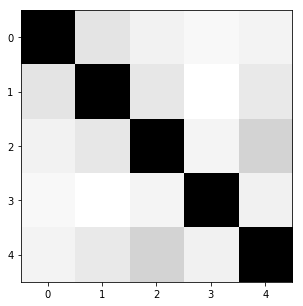

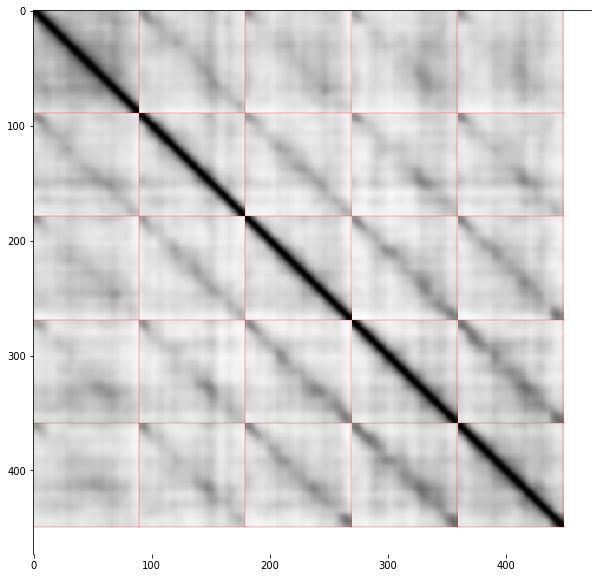

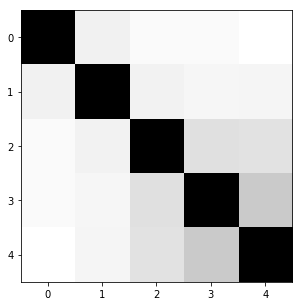

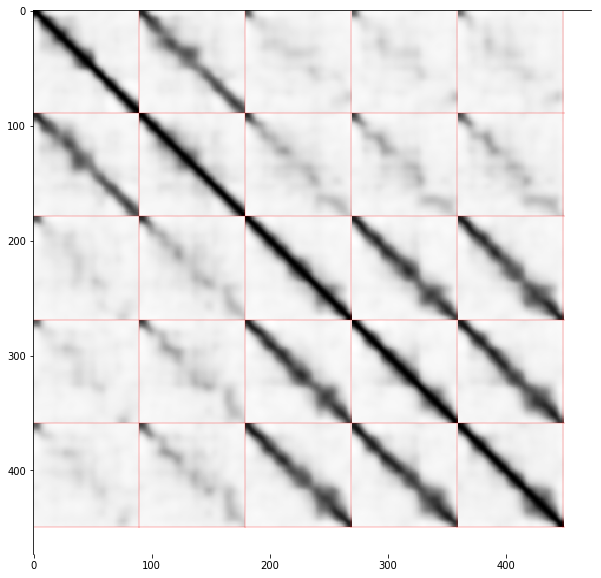

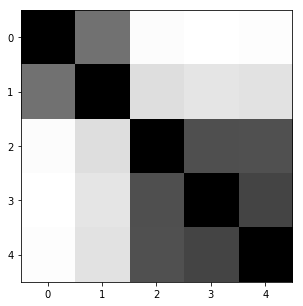

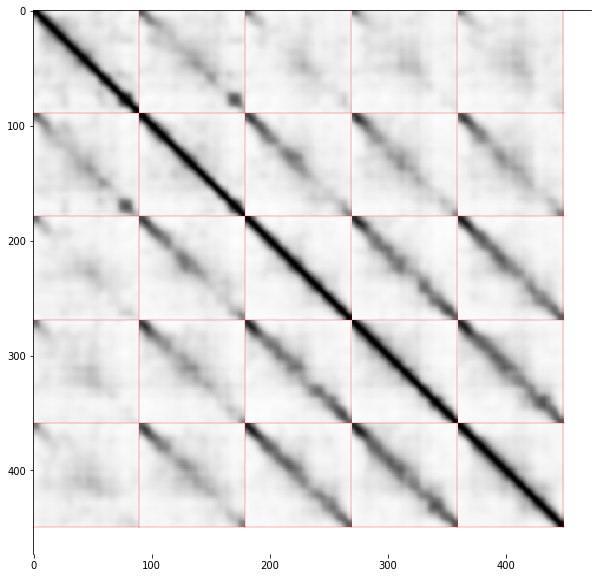

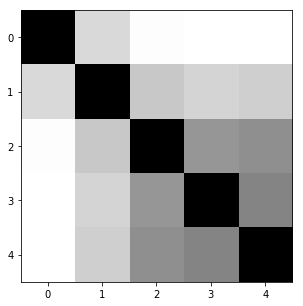

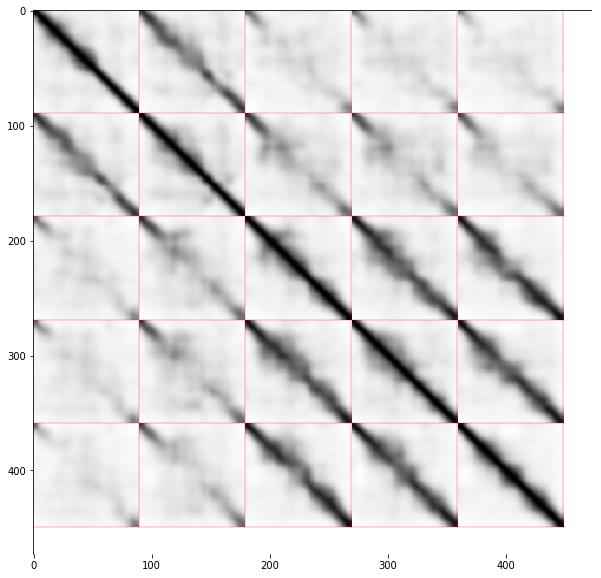

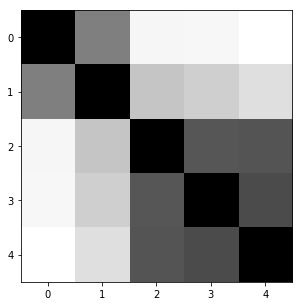

In [28]:
for m,mouse in enumerate(notask_mice):
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1') | df_mouse['ImagingRegion'].str.match('')]
    # no timeout 
    df_noTO = df_mouse[df_mouse['Track'].str.match('TwoTower_foraging')]
    noTO_morph = df_noTO.iloc[2]
    
    S_tmp,U_tmp,(f,ax),(f_U,ax_U)= sm.single_session(noTO_morph)
    if m == 0:
        S = np.zeros([S_tmp.shape[0],S_tmp.shape[1],len(tt_mice)])
        U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],len(tt_mice)])
    S[:,:,m]=S_tmp
    U[:,:,m]=U_tmp

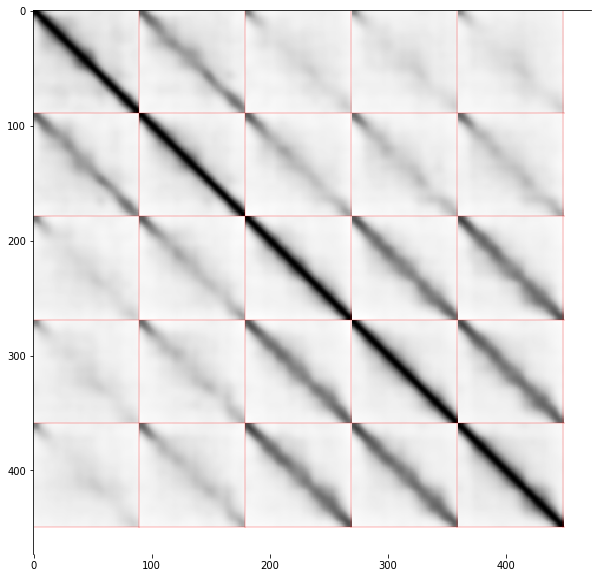

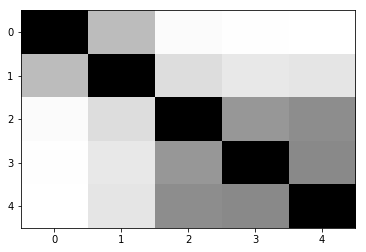

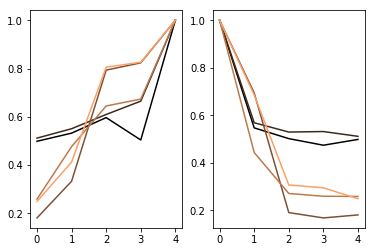

In [29]:
sm.plot_simmat(S.mean(axis=-1),5)
f,ax = plt.subplots()
ax.imshow(U.mean(axis=-1),aspect='auto',cmap='Greys')


f,ax = plt.subplots(1,2)
n = len(notask_mice)
for m in range(n):
    ax[0].plot(U[-1,:,m],color= plt.cm.copper(m/n))
    ax[1].plot(U[0,:,m],color = plt.cm.copper(m/n))

4139219.2
num aberrant ttls 0.0
(14831,) (14831, 20) 47727


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:279: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


(1950, 90) (90, 1950)
(1950, 180) (90, 1950)
(1950, 270) (90, 1950)
(1950, 360) (90, 1950)
num aberrant ttls 0.0
(23163,) (23163, 20) 73565
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:278: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


(1967, 90) (90, 1967)
(1967, 180) (90, 1967)
(1967, 270) (90, 1967)
(1967, 360) (90, 1967)
num aberrant ttls 0.0
(18728,) (18728, 20) 57221
frame diff 0
(1902, 90) (90, 1902)
(1902, 180) (90, 1902)
(1902, 270) (90, 1902)
(1902, 360) (90, 1902)
num aberrant ttls 0.0
(15816,) (15816, 20) 48107
frame diff 0
(1770, 90) (90, 1770)
(1770, 180) (90, 1770)
(1770, 270) (90, 1770)
(1770, 360) (90, 1770)
num aberrant ttls 0.0
(17339,) (17339, 20) 52237
frame diff 0
(1953, 90) (90, 1953)
(1953, 180) (90, 1953)
(1953, 270) (90, 1953)
(1953, 360) (90, 1953)
num aberrant ttls 0.0
(29258,) (29258, 20) 90985
frame diff 0
(1795, 90) (90, 1795)
(1795, 180) (90, 1795)
(1795, 270) (90, 1795)
(1795, 360) (90, 1795)
num aberrant ttls 0.0
(33725,) (33725, 20) 104008
frame diff 0
(2226, 90) (90, 2226)
(2226, 180) (90, 2226)
(2226, 270) (90, 2226)
(2226, 360) (90, 2226)
num aberrant ttls 0.0
(25429,) (25429, 20) 81271
frame diff 0
(1675, 90) (90, 1675)
(1675, 180) (90, 1675)
(1675, 270) (90, 1675)
(1675, 360) (

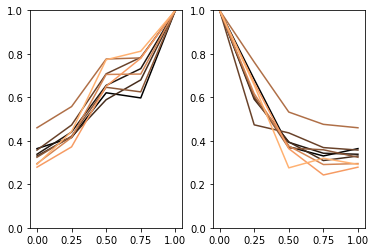

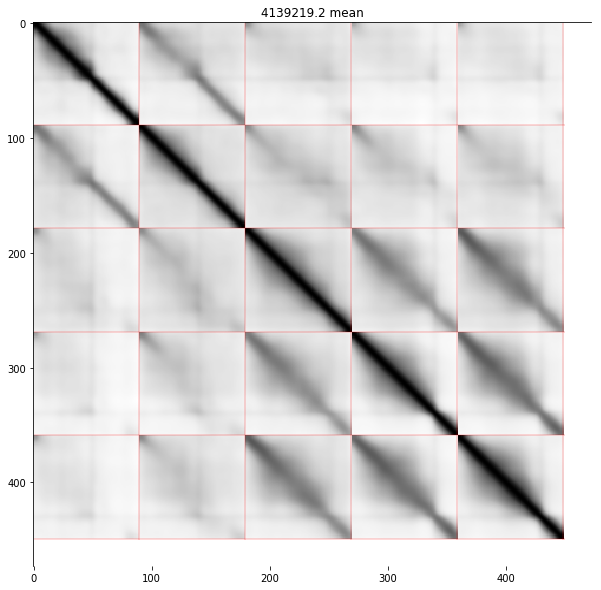

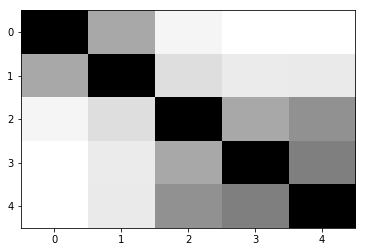

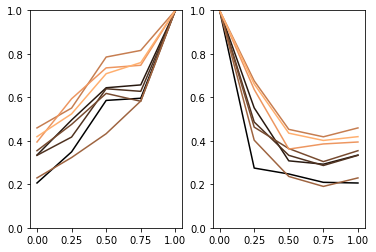

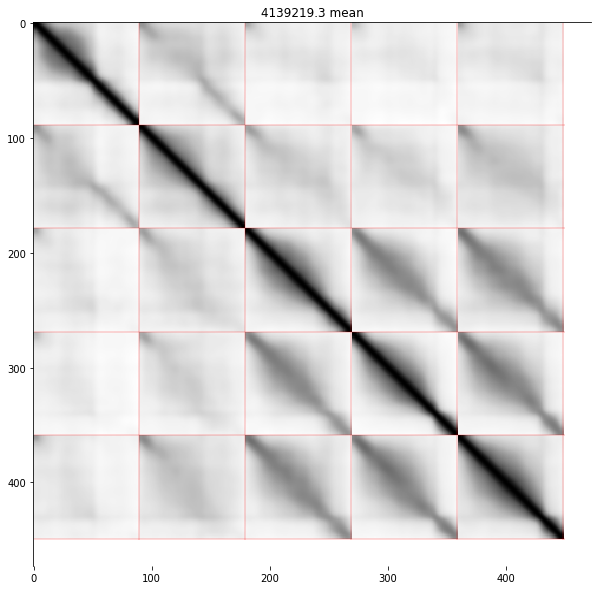

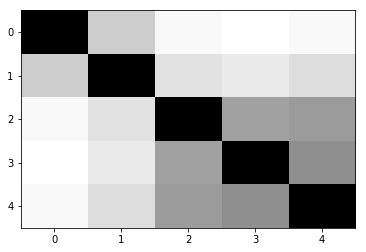

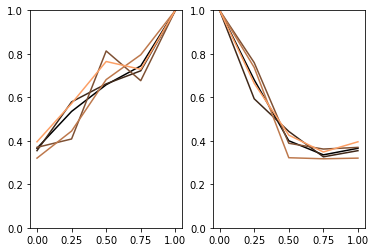

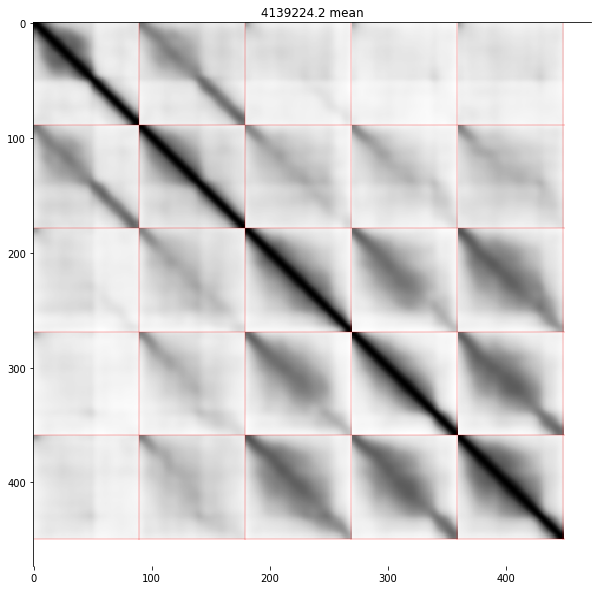

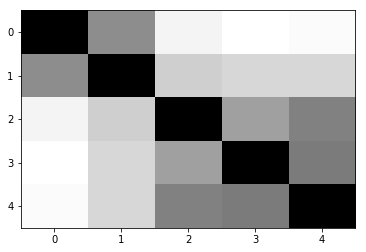

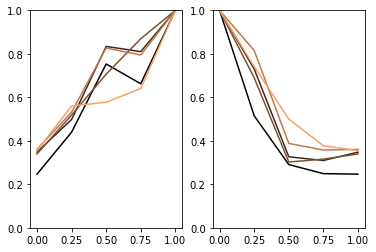

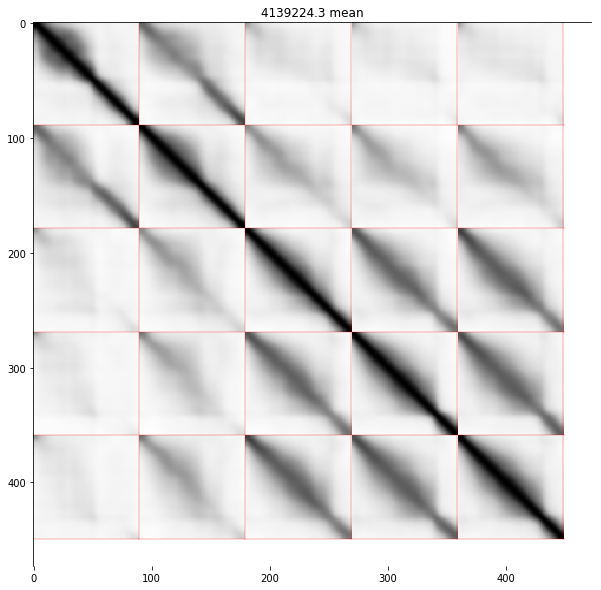

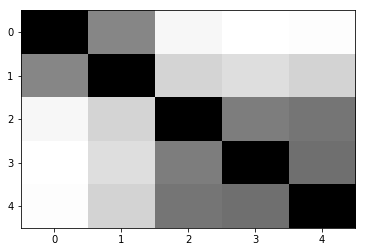

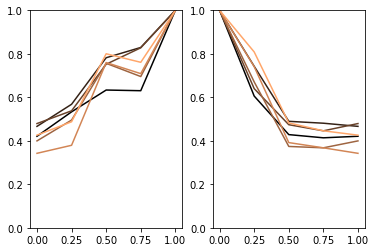

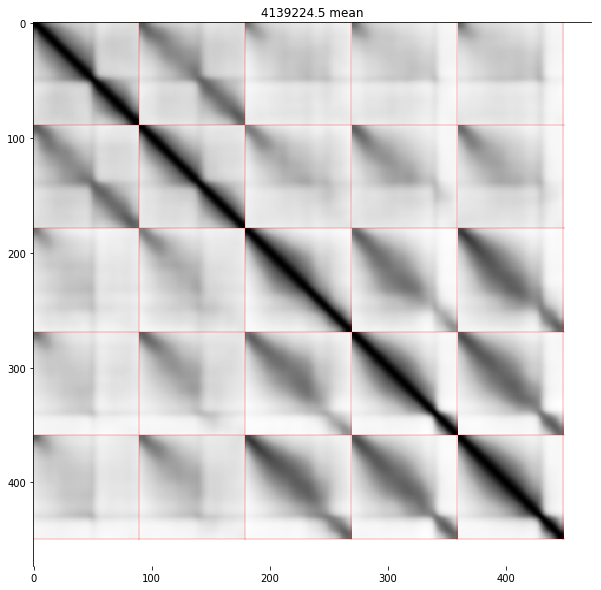

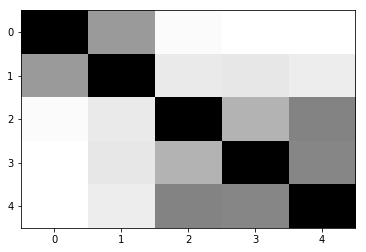

In [5]:
S_list = []
U_list = []
morphs = [0,.25,.5,.75,1]
dirbase = "G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\SimMats"
for m,mouse in enumerate(tt_mice):
    print(mouse)
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1')]
    # no timeout 
    df_TO = df_mouse[df_mouse['Track'].str.match('TwoTower_Timeout')]
    
    for s in range(2,df_TO.shape[0]):
        sess = df_TO.iloc[s]
#         print(sess)
        S_tmp,U_tmp= sm.single_session(sess,plot=False)
        
        if s == 2:
            S = np.zeros([S_tmp.shape[0],S_tmp.shape[1],df_TO.shape[0]-2])
            U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],df_TO.shape[0]-2])
        S[:,:,s-2]=S_tmp
        U[:,:,s-2]=U_tmp
        
    f,ax = plt.subplots(1,2)
    for j in range(U.shape[-1]):
        ax[0].plot(morphs,U[-1,:,j],color= plt.cm.copper(j/U.shape[-1]))
        ax[0].set_ylim([0,1])
        ax[1].plot(morphs,U[0,:,j],color = plt.cm.copper(j/U.shape[-1]))
        ax[1].set_ylim([0,1])
    f.savefig(os.path.join(dirbase,"%s_Uplots.pdf" % mouse),format='pdf')
    
    f,ax = sm.plot_simmat(S.mean(axis=-1),5)
    ax.set_title("%s mean" % mouse)
    f.savefig(os.path.join(dirbase,"%s_S.pdf" % mouse),format='pdf')
    
    f,ax = plt.subplots()
    ax.imshow(U.mean(axis=-1),aspect='auto',cmap='Greys')
    f.savefig(os.path.join(dirbase,"%s_U.pdf" % mouse),format='pdf')

    S_list.append(S.mean(axis=-1))
    U_list.append(U.mean(axis=-1))
    
    
    

In [18]:
print(np.array(S_list).shape)

(5, 450, 450)


4139260.2
num aberrant ttls 720.0
(30855,) (30855, 21) 109421


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(2005, 90) (90, 2005)
num aberrant ttls 695.0
(30922,) (30922, 21) 104028
frame diff 0
(2120, 90) (90, 2120)
num aberrant ttls 0.0
(22343,) (22343, 21) 74964
frame diff 0
(2017, 90) (90, 2017)
num aberrant ttls 0.0
(35049,) (35049, 21) 118620
frame diff 0
(1901, 90) (90, 1901)
(1901, 180) (90, 1901)
(1901, 270) (90, 1901)
(1901, 360) (90, 1901)
num aberrant ttls 0.0
(23996,) (23996, 21) 80724
frame diff 0
(1661, 90) (90, 1661)
(1661, 180) (90, 1661)
(1661, 270) (90, 1661)
(1661, 360) (90, 1661)
num aberrant ttls 0.0
(21323,) (21323, 21) 73229
frame diff 0
(1695, 90) (90, 1695)
(1695, 180) (90, 1695)
(1695, 270) (90, 1695)
(1695, 360) (90, 1695)
num aberrant ttls 0.0
(35765,) (35765, 21) 117023
frame diff 0
(1847, 90) (90, 1847)
(1847, 180) (90, 1847)
(1847, 270) (90, 1847)
(1847, 360) (90, 1847)
4139266.3
num aberrant ttls 359.0
(13848,) (13848, 21) 46563
frame diff 0
(1881, 90) (90, 1881)
num aberrant ttls 338.0
(12291,) (12291, 21) 42046
frame diff 0
(2015, 90) (90, 2015

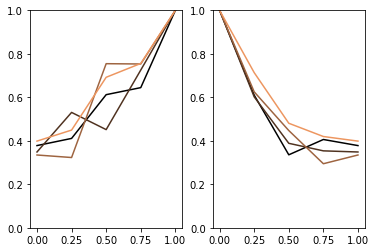

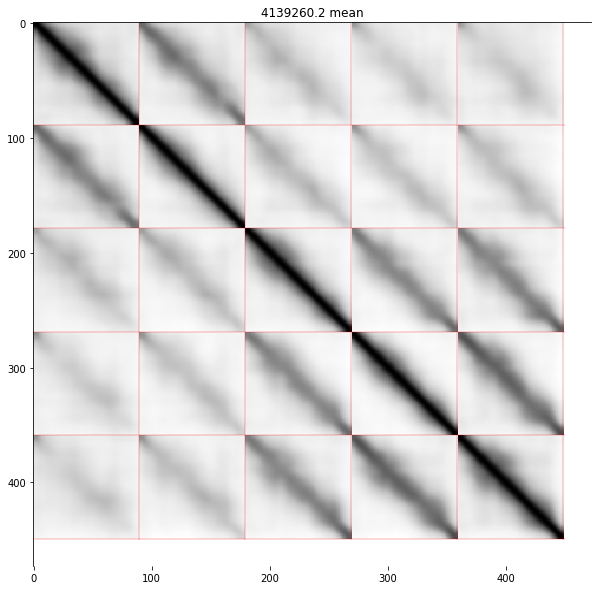

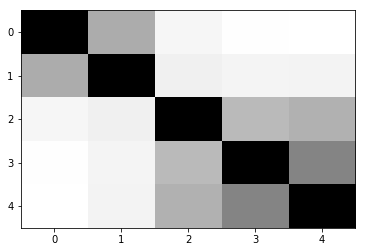

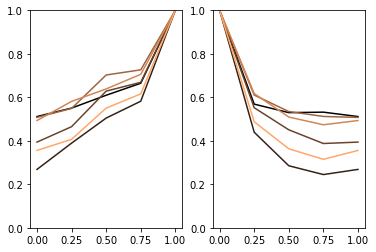

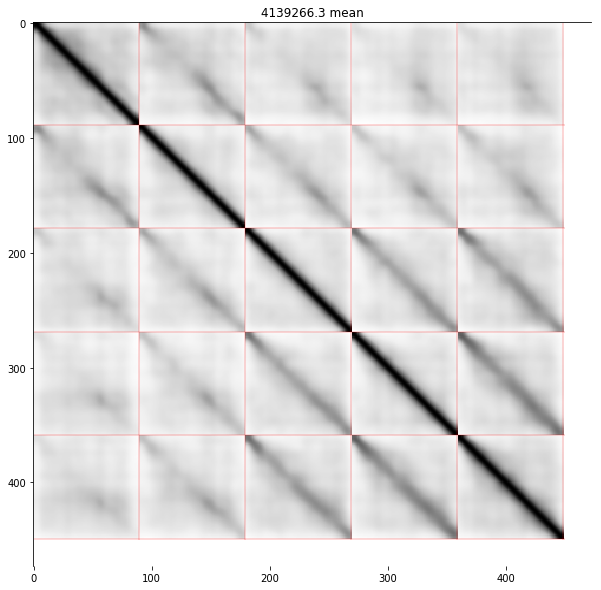

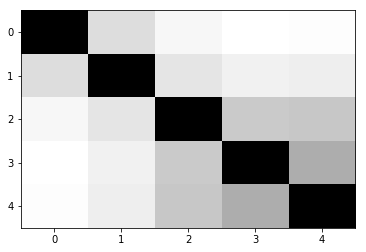

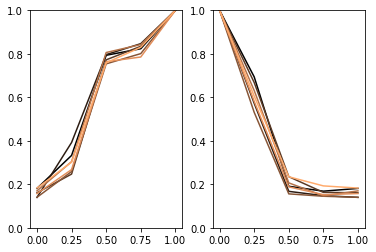

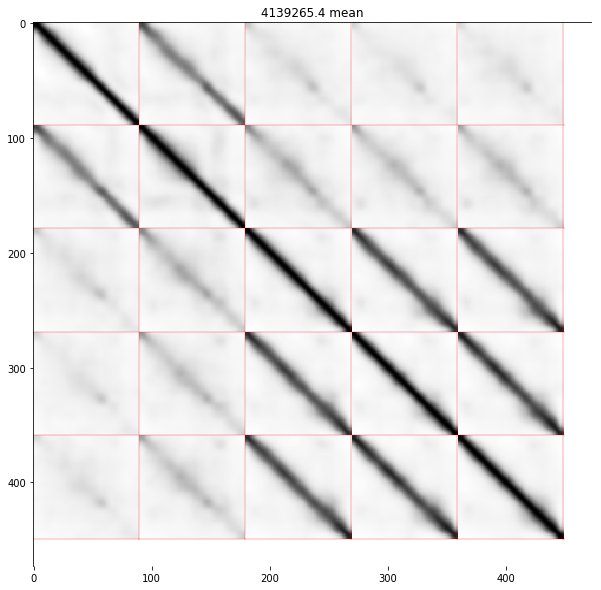

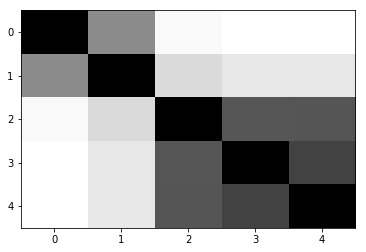

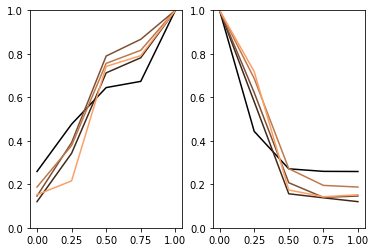

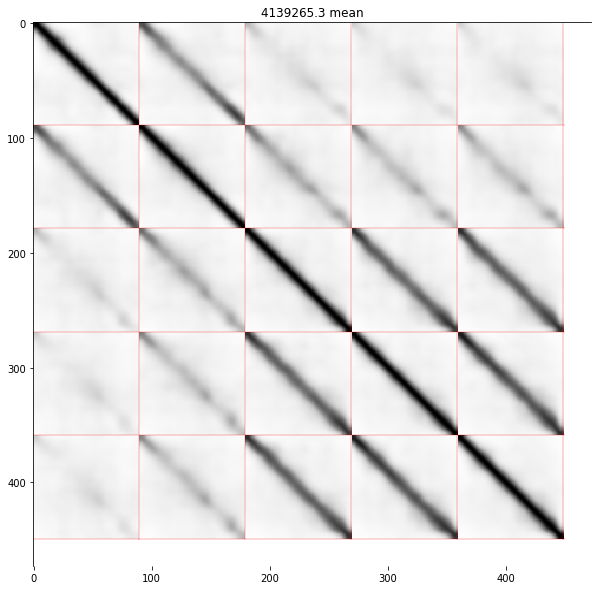

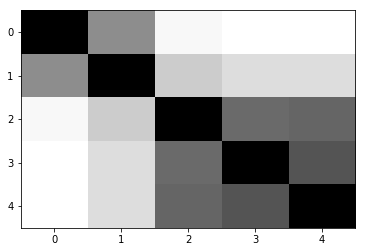

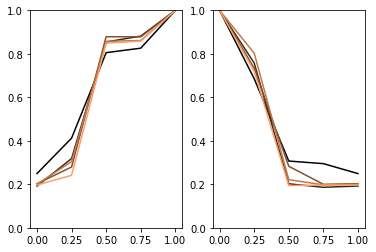

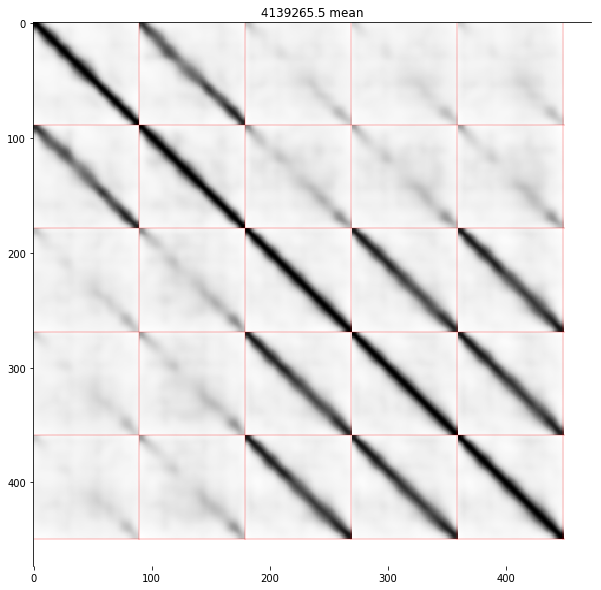

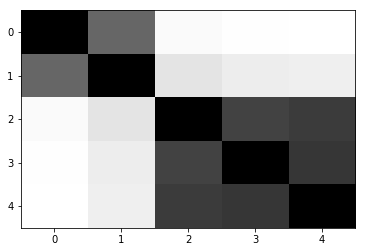

In [6]:
notask_mice = ['4139260.2','4139266.3','4139265.4','4139265.3','4139265.5']
# notask_mice = ['4139265.3','4139265.5','4139260.2']
S_notask_list = []
U_notask_list = []
morphs = [0,.25,.5,.75,1]
dirbase = "G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\SimMats"
for m,mouse in enumerate(notask_mice):
    print(mouse)
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1')]
    df_mouse = df_mouse[df_mouse['s2pfolder']!=None]
    # no timeout 
    df_f = df_mouse[df_mouse['Track'].str.match('TwoTower_foraging')]
    
#     print(df_f)
    
    
    S_sess, U_sess = [],[]
    for s in range(df_f.shape[0]):
        sess = df_f.iloc[s]
#         print(sess)
        try:
            S_tmp,U_tmp= sm.single_session(sess,plot=False)
            if U_tmp.shape[0]==5:
                S_sess.append(S_tmp)
                U_sess.append(U_tmp)
        except:
            print(sess['s2pfolder'])
        
    S = np.array(S_sess)
    U = np.array(U_sess)
        
    f,ax = plt.subplots(1,2)
    for j in range(U.shape[0]):
        ax[0].plot(morphs,U[j,-1,:],color= plt.cm.copper(j/U.shape[0]))
        ax[0].set_ylim([0,1])
        ax[1].plot(morphs,U[j,0,:],color = plt.cm.copper(j/U.shape[0]))
        ax[1].set_ylim([0,1])
    f.savefig(os.path.join(dirbase,"%s_Uplots.pdf" % mouse),format='pdf')
    
    f,ax = sm.plot_simmat(S.mean(axis=0),5)
    ax.set_title("%s mean" % mouse)
    f.savefig(os.path.join(dirbase,"%s_S.pdf" % mouse),format='pdf')
    
    f,ax = plt.subplots()
    ax.imshow(U.mean(axis=0),aspect='auto',cmap='Greys')
    f.savefig(os.path.join(dirbase,"%s_U.pdf" % mouse),format='pdf')

    S_notask_list.append(S.mean(axis=0))
    U_notask_list.append(U.mean(axis=0))
    

4139251.1
num aberrant ttls 0.0
(25391,) (25391, 21) 78066


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(1921, 90) (90, 1921)
num aberrant ttls 0.0
(23680,) (23680, 21) 74971
frame diff 0
(1862, 90) (90, 1862)
num aberrant ttls 0.0
(20307,) (20307, 21) 60456
frame diff 0
(1860, 90) (90, 1860)
(1860, 180) (90, 1860)
(1860, 270) (90, 1860)
(1860, 360) (90, 1860)
num aberrant ttls 0.0
(23129,) (23129, 21) 74568
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:279: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:278: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


(1866, 90) (90, 1866)
num aberrant ttls 1131.0
(29001,) (29001, 21) 91070
frame diff 0
(1844, 90) (90, 1844)
num aberrant ttls 900.0
(22128,) (22128, 21) 69966
frame diff 0
(1894, 90) (90, 1894)
(1894, 180) (90, 1894)
(1894, 270) (90, 1894)
(1894, 360) (90, 1894)
num aberrant ttls 501.0
(21668,) (21668, 21) 73157
frame diff 0
(1902, 90) (90, 1902)
(1902, 180) (90, 1902)
(1902, 270) (90, 1902)
(1902, 360) (90, 1902)
num aberrant ttls 836.0
(36089,) (36089, 21) 123951
frame diff 0
(1904, 90) (90, 1904)
(1904, 180) (90, 1904)
(1904, 270) (90, 1904)
(1904, 360) (90, 1904)
num aberrant ttls 473.0
(22829,) (22829, 21) 76727
frame diff 0
(1962, 90) (90, 1962)
(1962, 180) (90, 1962)
(1962, 270) (90, 1962)
(1962, 360) (90, 1962)
num aberrant ttls 682.0
(29462,) (29462, 21) 98906
frame diff 0
(2033, 90) (90, 2033)
(2033, 180) (90, 2033)
(2033, 270) (90, 2033)
(2033, 360) (90, 2033)
num aberrant ttls 656.0
(29461,) (29461, 21) 97467
frame diff 0
(2070, 90) (90, 2070)
(2070, 180) (90, 2070)
(2070,

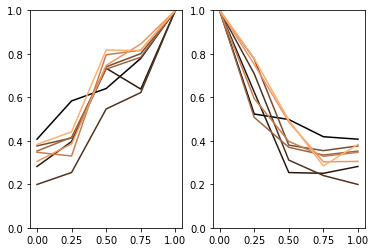

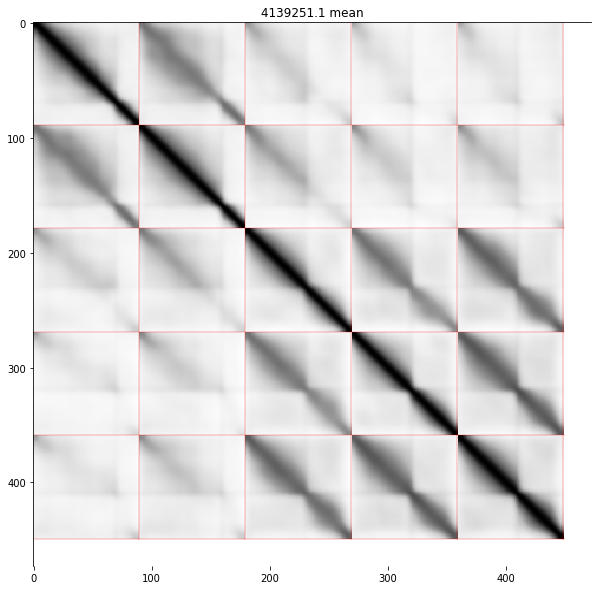

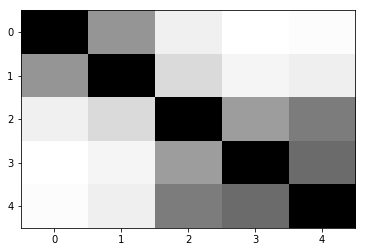

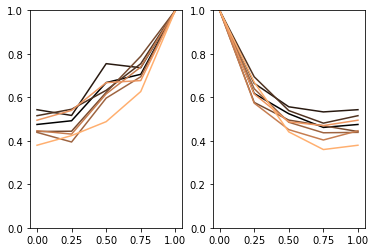

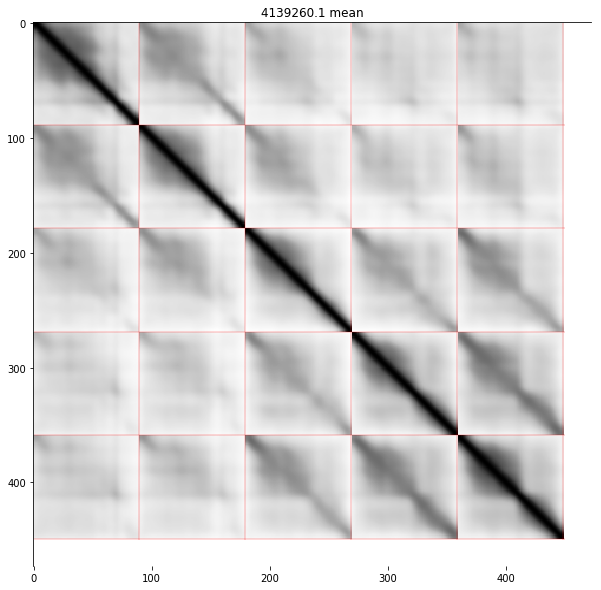

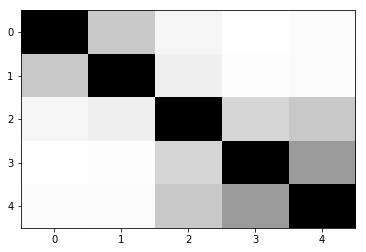

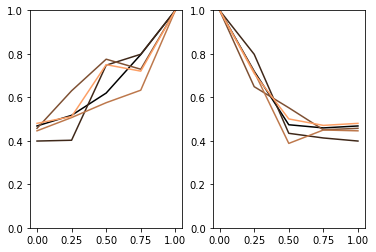

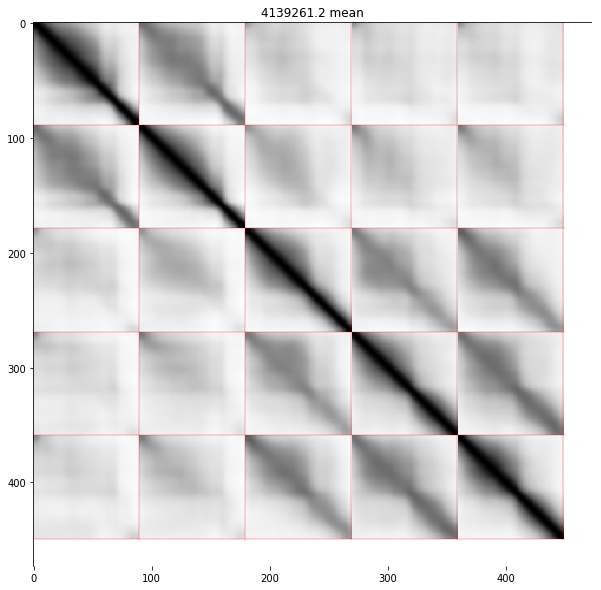

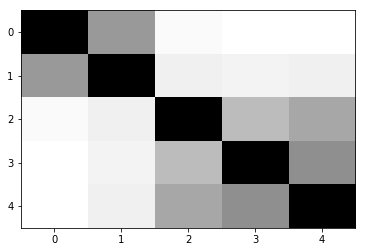

In [7]:
S_rev_list = []
U_rev_list = []
morphs = [0,.25,.5,.75,1]
dirbase = "G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\SimMats"
for m,mouse in enumerate(reversal_mice):
    print(mouse)
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['ImagingRegion'].str.match('CA1')]
    # no timeout 
    df_TO = df_mouse[df_mouse['Track'].str.match('Reversal')]
    
    S_sess, U_sess = [],[]
    for s in range(df_TO.shape[0]):
        sess = df_TO.iloc[s]
#         print(sess)
        try:
            S_tmp,U_tmp= sm.single_session(sess,plot=False)
            if U_tmp.shape[0]==5:
                S_sess.append(S_tmp)
                U_sess.append(U_tmp)
        except:
            print(sess['s2pfolder'])
        
    S = np.array(S_sess)
    U = np.array(U_sess)
        
    f,ax = plt.subplots(1,2)
    for j in range(U.shape[0]):
        ax[0].plot(morphs,U[j,-1,:],color= plt.cm.copper(j/U.shape[0]))
        ax[0].set_ylim([0,1])
        ax[1].plot(morphs,U[j,0,:],color = plt.cm.copper(j/U.shape[0]))
        ax[1].set_ylim([0,1])
    f.savefig(os.path.join(dirbase,"%s_Uplots.pdf" % mouse),format='pdf')
    
    
    f,ax = sm.plot_simmat(S.mean(axis=0),5)
    ax.set_title("%s mean" % mouse)
    f.savefig(os.path.join(dirbase,"%s_S.pdf" % mouse),format='pdf')
    
    f,ax = plt.subplots()
    ax.imshow(U.mean(axis=0),aspect='auto',cmap='Greys')
    f.savefig(os.path.join(dirbase,"%s_U.pdf" % mouse),format='pdf')

    S_rev_list.append(S.mean(axis=0))
    U_rev_list.append(U.mean(axis=0))

In [8]:
S_arr = np.array(S_list)
S_rev_arr = np.array(S_rev_list)
S_notask_arr = np.array(S_notask_list)


U_arr = np.array(U_list)
U_rev_arr = np.array(U_rev_list)
U_notask_arr = np.array(U_notask_list)

dirbase = "G:\\My Drive\\Figures\\TwoTower\\COSYNE2019\\SimMats"


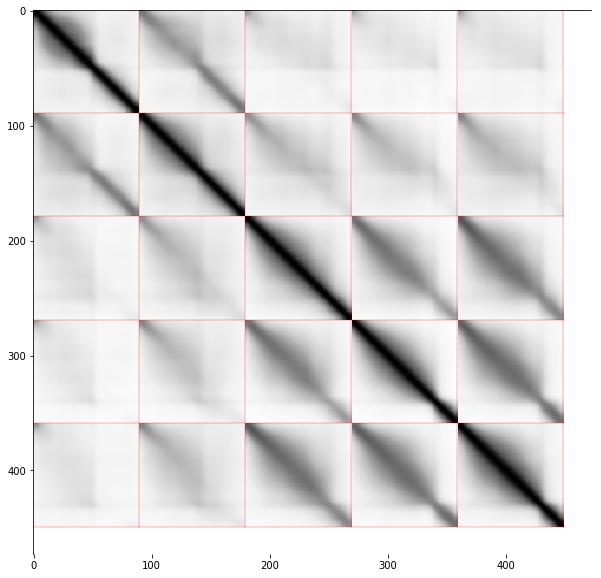

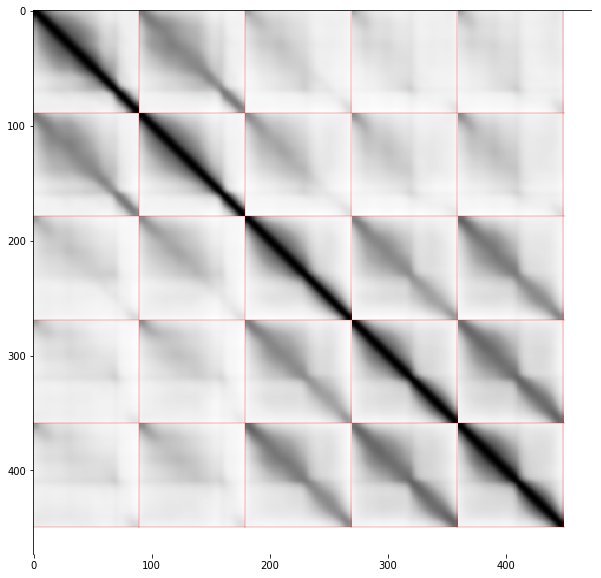

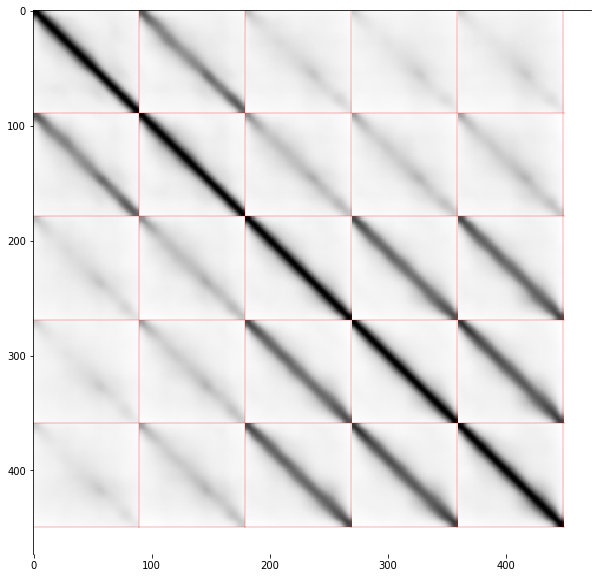

In [21]:

f,ax = sm.plot_simmat(S_arr.mean(axis=0),5)
f.savefig(os.path.join(dirbase,"TwoTowerGrandMean_S.pdf"),format='pdf')

f,ax = sm.plot_simmat(S_rev_arr.mean(axis=0),5)
f.savefig(os.path.join(dirbase,"ReversalGrandMean_S.pdf"),format='pdf')

f,ax = sm.plot_simmat(S_notask_arr.mean(axis=0),5)
f.savefig(os.path.join(dirbase,"ForagingGrandMean_S.pdf"),format='pdf')

In [10]:
U_arr.shape
U_arr.mean(axis=0)

array([[1.        , 0.6468338 , 0.38613114, 0.34583761, 0.35858206],
       [0.6468338 , 1.        , 0.49607519, 0.4714301 , 0.48469899],
       [0.38613114, 0.49607519, 1.        , 0.65666816, 0.70546332],
       [0.34583761, 0.4714301 , 0.65666816, 1.        , 0.72487002],
       [0.35858206, 0.48469899, 0.70546332, 0.72487002, 1.        ]])

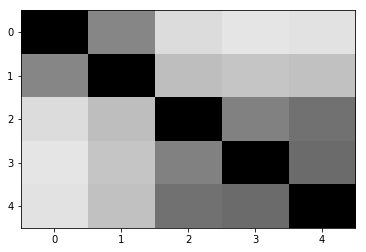

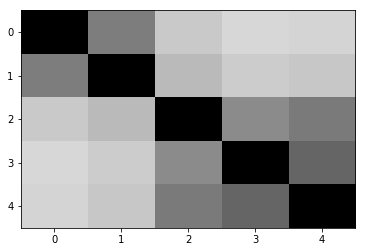

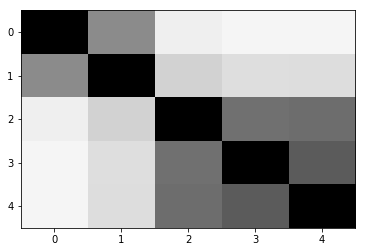

In [22]:
f,ax = plt.subplots()
ax.imshow(U_arr.mean(axis=0),cmap='Greys',aspect='auto',vmin=0.2,vmax=1)
f.savefig(os.path.join(dirbase,"TwoTowerGrandMean_U.pdf"),format='pdf')

f,ax = plt.subplots()
ax.imshow(U_rev_arr.mean(axis=0),cmap='Greys',aspect='auto',vmin=0.2,vmax=1)
f.savefig(os.path.join(dirbase,"ReversalGrandMean_U.pdf"),format='pdf')

f,ax = plt.subplots()
ax.imshow(U_notask_arr.mean(axis=0),cmap='Greys',aspect='auto',vmin=0.2,vmax=1)
f.savefig(os.path.join(dirbase,"ForagingGrandMean_U.pdf"),format='pdf')

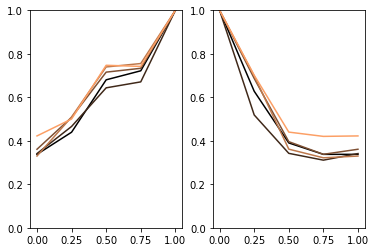

In [23]:
f,ax = plt.subplots(1,2)
for j in range(U_arr.shape[0]):
        ax[0].plot(morphs,U_arr[j,-1,:],color= plt.cm.copper(j/U_arr.shape[0]))
        ax[0].set_ylim([0,1])
        ax[1].plot(morphs,U_arr[j,0,:],color = plt.cm.copper(j/U_arr.shape[0]))
        ax[1].set_ylim([0,1])
f.savefig(os.path.join(dirbase,"TwoTowerGrandMean_Ulines.pdf"),format='pdf')

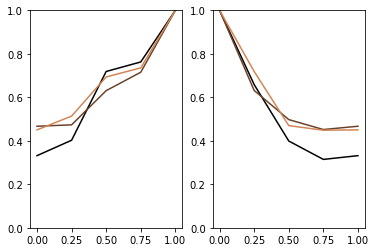

In [24]:
f,ax = plt.subplots(1,2)
for j in range(U_rev_arr.shape[0]):
        ax[0].plot(morphs,U_rev_arr[j,-1,:],color= plt.cm.copper(j/U_rev_arr.shape[0]))
        ax[0].set_ylim([0,1])
        ax[1].plot(morphs,U_rev_arr[j,0,:],color = plt.cm.copper(j/U_rev_arr.shape[0]))
        ax[1].set_ylim([0,1])
f.savefig(os.path.join(dirbase,"ReversalGrandMean_Ulines.pdf"),format='pdf')

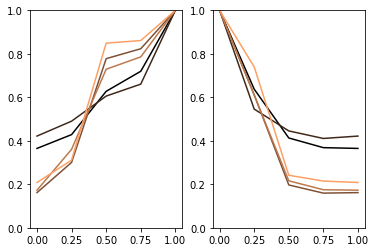

In [25]:
f,ax = plt.subplots(1,2)
for j in range(U_notask_arr.shape[0]):
        ax[0].plot(morphs,U_notask_arr[j,-1,:],color= plt.cm.copper(j/U_notask_arr.shape[0]))
        ax[0].set_ylim([0,1])
        ax[1].plot(morphs,U_notask_arr[j,0,:],color = plt.cm.copper(j/U_notask_arr.shape[0]))
        ax[1].set_ylim([0,1])
f.savefig(os.path.join(dirbase,"ForagingGrandMean_Ulines.pdf"),format='pdf')